In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import pandas as pd
import w3_tools
np.random.seed(3)

In [2]:
import test

In [6]:
# Create 30 data points datasets
m =30 
X,Y = make_regression(n_samples=30,n_features=1, noise=20, random_state=1)
# print(X,Y)
print(Y.ndim, Y.shape, X.ndim, X.shape)
print(X.shape, Y.shape)
# Since X is represented as vector 30*1 column so converting into matrix => 1*30
X =X.reshape((1,m))
print(X.shape, Y.shape)
Y = Y.reshape((1,m))
print(X.shape, Y.shape)
print('X:',X.ndim)
print('Y:',Y)

1 (30,) 2 (30, 1)
(30, 1) (30,)
(1, 30) (30,)
(1, 30) (1, 30)
X: 2
Y: [[ -3.01854669 -65.65047675  26.96755728   8.70562603  57.94332628
   -0.69293498 -78.66594473 -12.73881492 -13.26721663 -24.80488085
  -74.24484385 -39.99533724 -22.70174437  73.46766345  55.7257405
   23.80417646 -13.45481508  25.57952246  75.91238321  50.91155323
  -43.7191551   -1.7025559  -16.44931235 -33.54041234  20.4505961
   18.35949302  37.69029586  -1.04801683  -4.47915933 -20.89431647]]


Text(0, 0.5, '$y$')

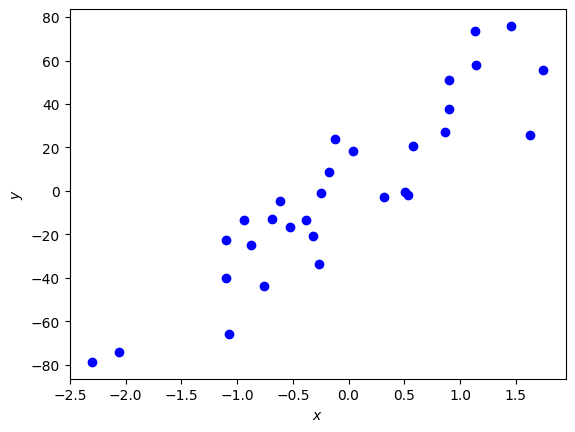

In [9]:
plt.scatter(X,  Y, c="blue")

plt.xlabel("$x$")
plt.ylabel("$y$")

In [15]:
X_shape = X.shape
Y_shape = Y.shape
training_example = X_shape[1]
print(X_shape,Y_shape,training_example)
test.test_shapes(X_shape, Y_shape, training_example)

(1, 30) (1, 30) 30
 All tests passed


In [21]:
def layer_size(X,Y):
    print(X.shape,Y.shape)
    n_x = X.shape[0]
    n_y = Y.shape[0]
    # returning as python tuple.
    return (n_x,n_y)

n_x, n_y =  layer_size(X,Y)
print("size of nueral network structure",n_x,n_y)

test.test_layer_sizes(layer_size)


(1, 30) (1, 30)
size of nueral network structure 1 1
(1, 30) (1, 30)
(5, 100) (3, 100)
 All tests passed


In [44]:
def initialize_model_params(n_x,n_y):
    w = np.random.randn(n_y,n_x) * 0.01
    b = np.zeros((n_y,1))
    assert (w.shape == (n_y, n_x))
    assert (b.shape == (n_y, 1))
    params = {"W":w, "b":b}
    return params

parameters = initialize_model_params(n_x,n_y)
test.test_initialize_parameters(initialize_model_params)




 All tests passed


In [54]:
def forward_propagation(X,parameters):
    W = parameters["W"]
    b = parameters["b"]
    predicted_y = np.dot(W,X) + b

    assert(predicted_y.shape == (n_x, X.shape[1]))
    return predicted_y

predicted_y = forward_propagation(X,parameters)
test.test_forward_propagation(forward_propagation)

 All tests passed


In [63]:
def cost_compute(Y,predicted_y):
    m = Y.shape[1]
    print(m, Y.shape, predicted_y.shape)
    cost = np.sum((predicted_y - Y) ** 2)/(2*m)
    return cost

print(cost_compute(Y,predicted_y))
    

30 (1, 30) (1, 30)
791.0621676050226


In [66]:
parameters = w3_tools.train_nn(parameters, predicted_y, X, Y)

print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[87.28313592]]
b = [[0.3551927]]


In [73]:
def nn_model(X,Y,num_iterations=10,show_cost=False):
    print("Inside")
    layer_sizes = layer_size(X,Y)
    n_x = layer_sizes[0]
    n_y = layer_sizes[1]
    
    parameters = initialize_model_params(n_x,n_y)
    for i in range(num_iterations):
        y_hat = forward_propagation(X,parameters)
        cost = cost_compute(Y,y_hat)
        parameters =  w3_tools.train_nn(parameters, y_hat, X, Y)
        if show_cost:
            print("Computed cost is:", cost)
    return parameters

parameters = nn_model(X,Y,15,show_cost=True)

W = parameters["W"]
b = parameters["b"]

test.test_nn_model(nn_model)
    


Inside
(1, 30) (1, 30)
30 (1, 30) (1, 30)
Computed cost is: 790.4177761636311
30 (1, 30) (1, 30)
Computed cost is: 176.47296318285981
30 (1, 30) (1, 30)
Computed cost is: 143.76809216752073
30 (1, 30) (1, 30)
Computed cost is: 141.43327479510305
30 (1, 30) (1, 30)
Computed cost is: 141.2487166735392
30 (1, 30) (1, 30)
Computed cost is: 141.23372580825995
30 (1, 30) (1, 30)
Computed cost is: 141.23249998795075
30 (1, 30) (1, 30)
Computed cost is: 141.2323995894764
30 (1, 30) (1, 30)
Computed cost is: 141.23239136335297
30 (1, 30) (1, 30)
Computed cost is: 141.2323906892853
30 (1, 30) (1, 30)
Computed cost is: 141.23239063404938
30 (1, 30) (1, 30)
Computed cost is: 141.2323906295231
30 (1, 30) (1, 30)
Computed cost is: 141.2323906291522
30 (1, 30) (1, 30)
Computed cost is: 141.2323906291218
30 (1, 30) (1, 30)
Computed cost is: 141.23239062911932
Inside
(1, 30) (1, 30)
30 (1, 30) (1, 30)
30 (1, 30) (1, 30)
30 (1, 30) (1, 30)
30 (1, 30) (1, 30)
30 (1, 30) (1, 30)
30 (1, 30) (1, 30)
30 (1, 

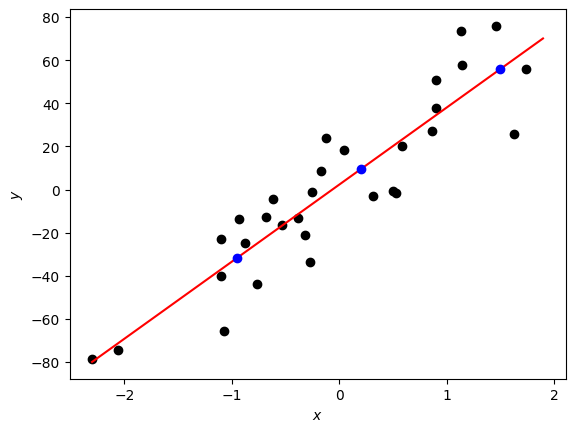

In [90]:
X_pred = np.array([-0.95, 0.2, 1.5])
fig, ax = plt.subplots()
plt.scatter(X, Y, color = "black")

plt.xlabel("$x$")
plt.ylabel("$y$")
    
X_line = np.arange(np.min(X[0,:]),np.max(X[0,:])*1.1, 0.1)
plt.plot(X_line, W[0,0] * X_line + b[0,0], "r")
plt.plot(X_pred, W[0,0] * X_pred + b[0,0], "bo")
plt.plot()
plt.show()